В Татарстане 1616 объектов культурного наследия.
В Алтайском крае 4480 объектов культурного наследия.


C:\Users\get.HP\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


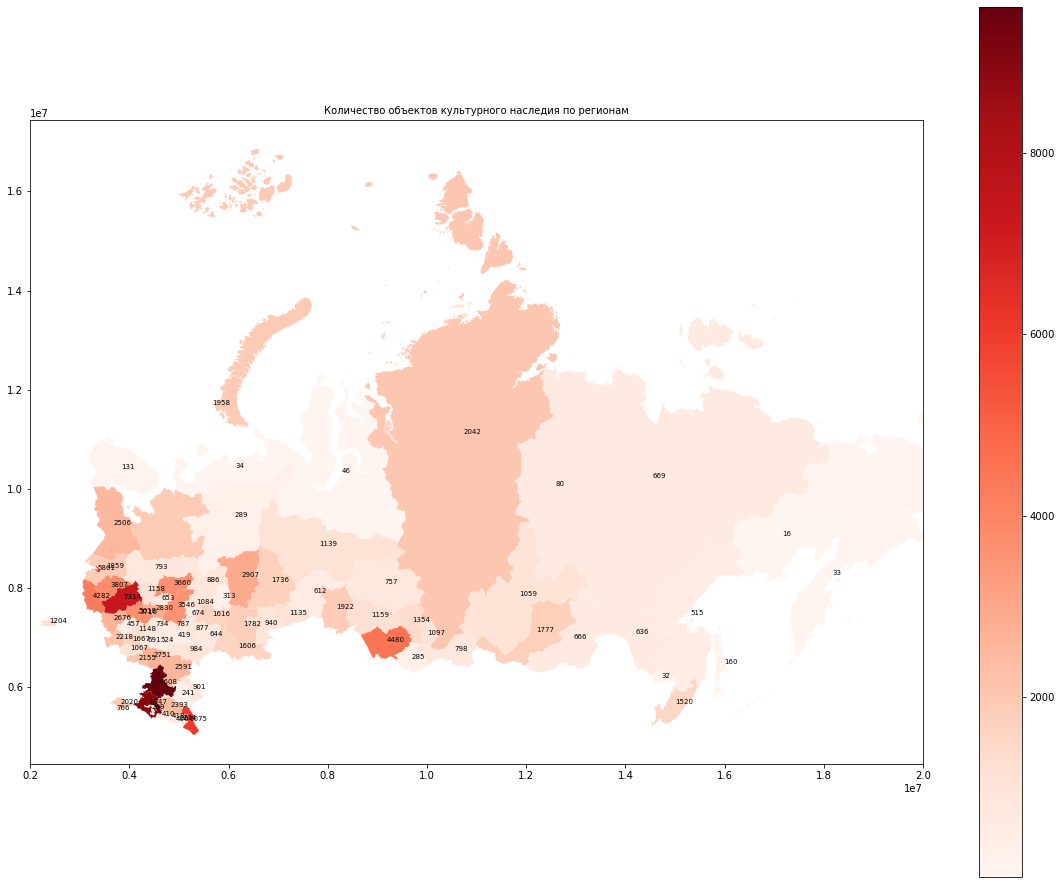

In [3]:
'''Изучите набор данных по объектам культурного наследия России (в виде gz-архива):
https://video.ittensive.com/python-advanced/data-44-structure-4.csv.gz
и постройте фоновую картограмму по количеству объектов в каждом регионе России, используя гео-данные
https://video.ittensive.com/python-advanced/russia.json
Выведите для каждого региона количество объектов в нем.
Посчитайте число объектов культурного наследия в Татарстане.
Чему равно число объектов культурного наследия в Алтайском крае?'''

import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import descartes

df = pd.read_csv("data-44-structure-4.csv.gz", usecols=['Регион', 'Объект'])
df['Регион'] = df['Регион'].str.upper()
#print(df.head())

df = df.replace({
    "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА": "ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ",
    "РЕСПУБЛИКА АДЫГЕЯ (АДЫГЕЯ)": "РЕСПУБЛИКА АДЫГЕЯ",
    "ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ": "ЧУВАШСКАЯ РЕСПУБЛИКА",
    "РЕСПУБЛИКА МАРИЙ ЭЛ": "РЕСПУБЛИКА МАРИЙ-ЭЛ",
    "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ - АЛАНИЯ": "РЕСПУБЛИКА СЕВЕРНАЯ ОСЕТИЯ",
    "РЕСПУБЛИКА ТАТАРСТАН (ТАТАРСТАН)": "РЕСПУБЛИКА ТАТАРСТАН"
})

mem = df.groupby("Регион").count()
#print(mem.index.values)

print('В Татарстане', mem.loc['РЕСПУБЛИКА ТАТАРСТАН'][0], 'объектов культурного наследия.')
print('В Алтайском крае', mem.loc['АЛТАЙСКИЙ КРАЙ'][0], 'объектов культурного наследия.')

data = gpd.read_file("https://video.ittensive.com/python-advanced/russia.json")
#print(data.head())
data["NL_NAME_1"] = data['NL_NAME_1'].str.upper()

data = pd.merge(left=data, right=mem,
               left_on="NL_NAME_1", right_on="Регион", how="left")
#print (data[data["Объект"].isnull()])

data = data.to_crs({'init': 'epsg:3857'})

fig = plt.figure(figsize=(20,16))
area = plt.subplot(1, 1, 1)
data.plot(ax=area, legend=True, column="Объект", cmap="Reds")
area.set_xlim(2e6, 2e7) # Устанавливаем лимиты по оси х: отрезаем Чукотку с запада до Калининградской области.

plt.title("Количество объектов культурного наследия по регионам", fontsize=10)

for _,reg in data.iterrows():
    area.annotate(int(reg["Объект"]),
                  xy=(reg.geometry.centroid.x, reg.geometry.centroid.y), fontsize=7)
plt.show()